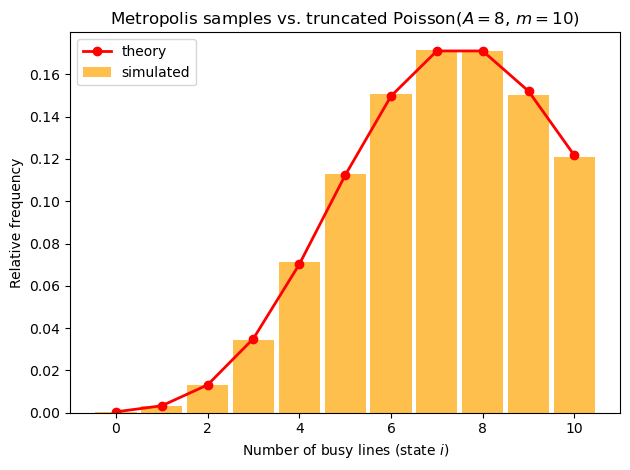

χ² statistic =   7.81  (df=10)
p-value      =  0.648


In [41]:
# Exercise 6.1 – truncated Poisson via Metropolis-Hastings
import numpy as np
import math, random
import matplotlib.pyplot as plt
from scipy.stats import chi2          # for the p-value

# ------- parameters -------
n = 100_000          # samples to collect
m = 10              # number of servers  => states 0…10
A = 8               # offered traffic

# ------- Metropolis sampler -------
i = np.random.randint(m + 1)      # start anywhere 0…10
samples = []

while len(samples) < n:
    # 1) propose neighbour
    j = i + random.choice((-1, +1))
    if j < 0 or j > m:            # bounce off the edge
        j = i

    # 2) acceptance ratio
    wi = A**i / math.factorial(i)
    wj = A**j / math.factorial(j)
    r  = wj / wi

    # 3) accept / reject
    if r >= 1 or random.random() < r:
        i = j                     # move
    samples.append(i)             # record current state

samples = np.array(samples)

# ------------------------------------------------------------------
# PART A – histogram vs. exact probabilities
# ------------------------------------------------------------------
ks = np.arange(m + 1)
theo_probs = (A**ks / np.array([math.factorial(k) for k in ks]))
theo_probs /= theo_probs.sum()                # normalise (truncation)

counts, _ = np.histogram(samples, bins=np.arange(m+2), density=True)

plt.bar(ks, counts, width=.9, label='simulated', alpha=0.7, color='orange')
plt.plot(ks, theo_probs, 'r-o', label='theory', linewidth=2)
plt.xlabel('Number of busy lines (state $i$)')
plt.ylabel('Relative frequency')
plt.title('Metropolis samples vs. truncated Poisson($A=8$, $m=10$)')
plt.legend()
plt.tight_layout()
plt.show()

# ------------------------------------------------------------------
# PART B – χ² goodness-of-fit test
# ------------------------------------------------------------------
obs_counts = np.bincount(samples, minlength=m+1)
exp_counts = n * theo_probs
chi_stat   = ((obs_counts - exp_counts)**2 / exp_counts).sum()
p_value    = chi2.sf(chi_stat, df=m)          # df = number-of-states – 1

print(f"χ² statistic = {chi_stat:6.2f}  (df={m})")
print(f"p-value      = {p_value:6.3f}")

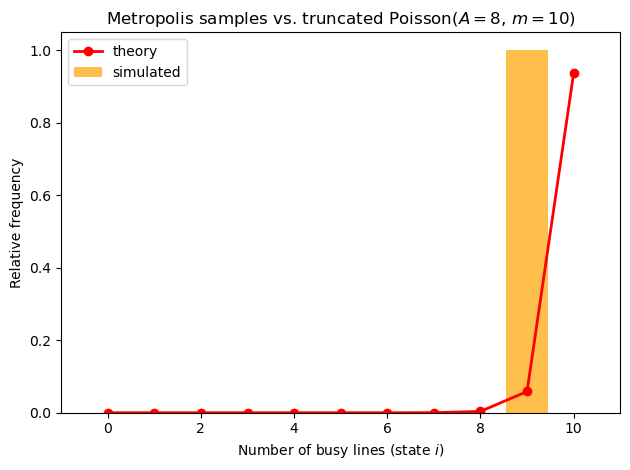

χ² statistic = 1606666.67  (df=10)
p-value      =  0.000


In [45]:
# Exercise 6.2a 

import numpy as np
import math, random
import matplotlib.pyplot as plt
from scipy.stats import chi2          # for the p-value

# ------- parameters -------
n = 100_000          # samples to collect
m = 10              # number of servers  => states 0…10
A = 4             # offered traffic

# ------- Metropolis sampler -------
i = np.random.randint(m + 1)      # start anywhere 0…10
samples = []

while len(samples) < n:
    # propose neighbour on 2-D grid with bounce at i<0, j<0 or i+j>m
    di, dj = random.choice([(1,0), (-1,0), (0,1), (0,-1)])
    ni, nj = i + di, j + dj
    if ni < 0 or nj < 0 or ni + nj > m:          # outside the triangle → stay put
        ni, nj = i, j

    # 2) acceptance ratio
    wij = (A**i*A**j) / (math.factorial(i)*math.factorial(j))
    nextwij = (A**ni*A**nj) / (math.factorial(ni)*math.factorial(nj))
    r  = wij / nextwij

    # 3) accept / reject
    if r >= 1 or random.random() < r:
        i = j                     # move
    samples.append(i)             # record current state

samples = np.array(samples)

# ------------------------------------------------------------------
# PART A – histogram vs. exact probabilities
# ------------------------------------------------------------------
ks = np.arange(m + 1)
theo_probs = (A**ks*A**ks) / (np.array([math.factorial(k) for k in ks]))*(np.array([math.factorial(k) for k in ks]))
theo_probs /= theo_probs.sum()                # normalise (truncation)

counts, _ = np.histogram(samples, bins=np.arange(m+2), density=True)

plt.bar(ks, counts, width=.9, label='simulated', alpha=0.7, color='orange')
plt.plot(ks, theo_probs, 'r-o', label='theory', linewidth=2)
plt.xlabel('Number of busy lines (state $i$)')
plt.ylabel('Relative frequency')
plt.title('Metropolis samples vs. truncated Poisson($A=8$, $m=10$)')
plt.legend()
plt.tight_layout()
plt.show()

# ------------------------------------------------------------------
# PART B – χ² goodness-of-fit test
# ------------------------------------------------------------------
obs_counts = np.bincount(samples, minlength=m+1)
exp_counts = n * theo_probs
chi_stat   = ((obs_counts - exp_counts)**2 / exp_counts).sum()
p_value    = chi2.sf(chi_stat, df=m)          # df = number-of-states – 1

print(f"χ² statistic = {chi_stat:6.2f}  (df={m})")
print(f"p-value      = {p_value:6.3f}")

first 10 samples: [[4 3]
 [3 3]
 [4 3]
 [4 2]
 [5 2]
 [4 2]
 [3 2]
 [3 2]
 [4 2]
 [5 2]]

χ² statistic = 260.38  (df = 65)
p-value      = 0.0000


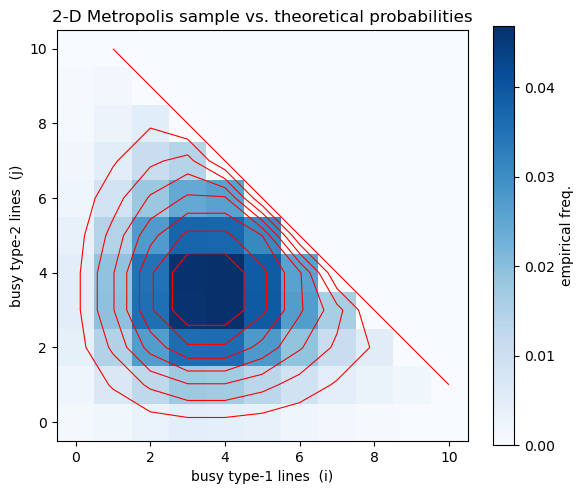

In [ ]:
# Exercise 6.2 a – Truncated 2-D Poisson (two call types, A1 = A2 = 4)
# Metropolis–Hastings sampler + χ² check

import random, math, numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# ------------------------------------------------------
# parameters
# ------------------------------------------------------
n      = 100_000          # samples to keep
m      = 10               # capacity → i+j ≤ 10
A1 = A2 = 4               # offered traffic of each type
burn   = 1_000            # discard first burn-in steps

# ------------------------------------------------------
# Metropolis sampler on the triangular grid
# ------------------------------------------------------
# start at a random feasible pair (i,j)
while True:
    i, j = np.random.randint(0, m+1, size=2)
    if i + j <= m:
        break

samples = []
steps   = 0
while len(samples) < n + burn:
    # 1) propose neighbour (N,S,E,W)
    di, dj = random.choice([(1,0), (-1,0), (0,1), (0,-1)])
    ni, nj = i + di, j + dj
    if ni < 0 or nj < 0 or ni + nj > m:   # bounce
        ni, nj = i, j

    # 2) acceptance ratio r = w(new)/w(curr)
    wi  = (A1**i / math.factorial(i)) * (A2**j / math.factorial(j))
    wj  = (A1**ni / math.factorial(ni)) * (A2**nj / math.factorial(nj))
    r   = wj / wi

    # 3) accept / reject
    if r >= 1 or random.random() < r:
        i, j = ni, nj                      # move

    # 4) record (after burn-in)
    steps += 1
    if steps > burn:
        samples.append((i, j))

samples = np.array(samples)                # shape (n, 2)
print("first 10 samples:", samples[:10])

# ------------------------------------------------------
# Build empirical 2-D frequency table
# ------------------------------------------------------
obs = np.zeros((m+1, m+1), dtype=int)
for i, j in samples:
    obs[i, j] += 1

# ------------------------------------------------------
# Theoretical (truncated) probabilities
# ------------------------------------------------------
theo = np.zeros_like(obs, dtype=float)
for i in range(m+1):
    for j in range(m+1):
        if i + j <= m:
            theo[i, j] = (A1**i / math.factorial(i)) * (A2**j / math.factorial(j))
theo /= theo.sum()          # normalise over the triangle

# ------------------------------------------------------
# χ² goodness-of-fit test (flatten the triangle)
# ------------------------------------------------------
obs_flat  = obs[theo > 0].ravel()
exp_flat  = n * theo[theo > 0].ravel()
chi_stat  = ((obs_flat - exp_flat)**2 / exp_flat).sum()
df        = len(exp_flat) - 1          # all cells non-empty
p_value   = chi2.sf(chi_stat, df)

print(f"\nχ² statistic = {chi_stat:.2f}  (df = {df})")
print(f"p-value      = {p_value:.4f}")

# ------------------------------------------------------
# optional: contour plot of empirical vs. theory
# ------------------------------------------------------
plt.figure(figsize=(6,5))
plt.imshow(obs / n, origin='lower', cmap='Blues', extent=[-0.5, m+0.5, -0.5, m+0.5])
plt.colorbar(label='empirical freq.')
plt.contour(np.arange(m+1), np.arange(m+1), theo, colors='red', linewidths=0.8)
plt.title('2-D Metropolis sample vs. theoretical probabilities')
plt.xlabel('busy type-1 lines  (i)')
plt.ylabel('busy type-2 lines  (j)')
plt.tight_layout()
plt.show()

χ² statistic = 489.54  (df=65)
p-value      = 0.0000


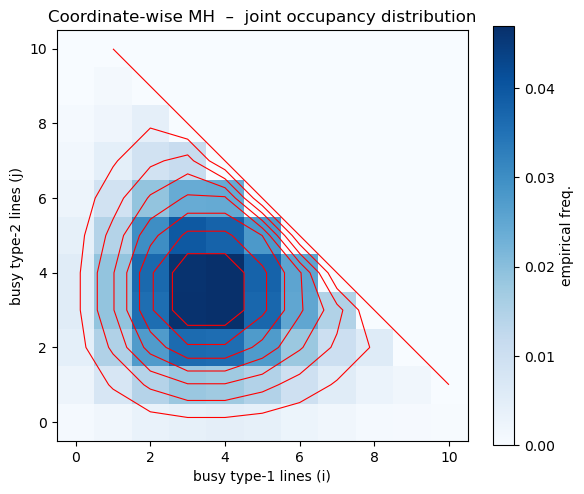

In [47]:
# Exercise 6.2 b – Coordinate-wise Metropolis–Hastings
# (joint truncated Poisson with A1 = A2 = 4, m = 10)

import random, math, numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# ───── parameters ──────────────────────────────────────────
n_samples = 100_000          # samples to keep
burn      = 1_000            # burn-in steps
m         = 10               # capacity  i + j ≤ m
A1 = A2   = 4                # offered traffic

# ───── initialise at a feasible point ─────────────────────
while True:
    i, j = np.random.randint(0, m + 1, size=2)
    if i + j <= m:
        break

samples, steps = [], 0

# ───── coordinate-wise Metropolis–Hastings loop ───────────
while len(samples) < n_samples + burn:
    # 1) choose which axis to wiggle (0 => i, 1 => j)
    if random.random() < 0.5:                 # update i only
        ni, nj = i + random.choice((-1, +1)), j
    else:                                     # update j only
        ni, nj = i, j + random.choice((-1, +1))

    # bounce off the slanted border or negative axis
    if ni < 0 or nj < 0 or ni + nj > m:
        ni, nj = i, j                        # reject move immediately

    # 2) acceptance ratio  r = w(new)/w(old)
    w_curr = (A1**i / math.factorial(i)) * (A2**j  / math.factorial(j))
    w_prop = (A1**ni / math.factorial(ni)) * (A2**nj / math.factorial(nj))
    r      = w_prop / w_curr

    # 3) accept / reject
    if r >= 1 or random.random() < r:
        i, j = ni, nj

    steps += 1
    if steps > burn:
        samples.append((i, j))

samples = np.asarray(samples)     # shape (n_samples, 2)

# ───── empirical 2-D table ─────────────────────────────────
obs = np.zeros((m + 1, m + 1), dtype=int)
for i, j in samples:
    obs[i, j] += 1

# ───── theoretical probabilities (truncated normalisation) ─
theo = np.zeros_like(obs, dtype=float)
for i in range(m + 1):
    for j in range(m + 1):
        if i + j <= m:
            theo[i, j] = (A1**i / math.factorial(i)) * (A2**j / math.factorial(j))
theo /= theo.sum()

# ───── χ² test ─────────────────────────────────────────────
obs_flat = obs[theo > 0].ravel()
exp_flat = n_samples * theo[theo > 0].ravel()
chi_stat = ((obs_flat - exp_flat) ** 2 / exp_flat).sum()
df       = len(exp_flat) - 1
p_val    = chi2.sf(chi_stat, df)

print(f"χ² statistic = {chi_stat:.2f}  (df={df})")
print(f"p-value      = {p_val:.4f}")

# ───── contour / heat-map plot (optional) ──────────────────
plt.figure(figsize=(6,5))
plt.imshow(obs / n_samples, origin='lower', cmap='Blues',
           extent=[-0.5, m+0.5, -0.5, m+0.5])
plt.colorbar(label='empirical freq.')
plt.contour(np.arange(m+1), np.arange(m+1), theo, colors='red', linewidths=0.8)
plt.title('Coordinate-wise MH  –  joint occupancy distribution')
plt.xlabel('busy type-1 lines (i)')
plt.ylabel('busy type-2 lines (j)')
plt.tight_layout()
plt.show()

χ² = 87.67  (df=65)  p-value = 0.0320


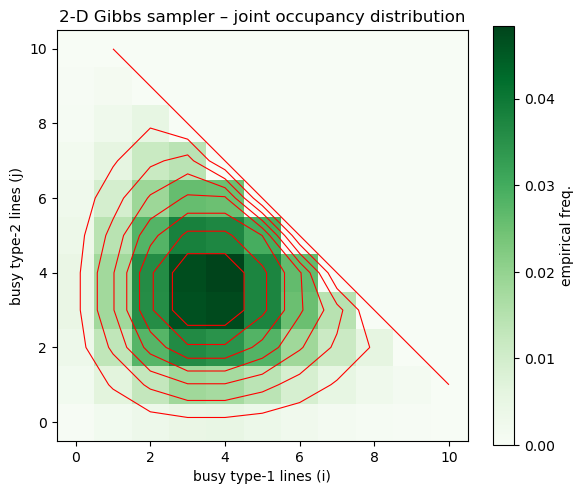

In [48]:
import random, math, numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# ───────── parameters ─────────
n_samples = 100_000      # samples to keep (after burn-in)
burn      = 1_000        # burn-in steps to discard
m         = 10           # capacity: i + j ≤ m
A1 = A2   = 4            # offered traffic of each type

# ───────── pre-compute 1-D weights ─────────
w_i = np.array([A1**k / math.factorial(k) for k in range(m + 1)])
w_j = np.array([A2**k / math.factorial(k) for k in range(m + 1)])

def draw_conditional(weights, k_max):
    """Draw k∈{0,…,k_max} ∝ weights[k] (normalised on the fly)."""
    probs = weights[:k_max+1]
    return np.searchsorted(np.cumsum(probs / probs.sum()), random.random())

# ───────── initialise at any feasible (i,j) ─────────
while True:
    i, j = np.random.randint(0, m + 1, size=2)
    if i + j <= m:
        break

samples, steps = [], 0

# ───────── Gibbs loop ─────────
while len(samples) < n_samples + burn:
    i = draw_conditional(w_i, m - j)   # resample I | J
    j = draw_conditional(w_j, m - i)   # resample J | I
    steps += 1
    if steps > burn:
        samples.append((i, j))

samples = np.asarray(samples)          # shape (n_samples, 2)

# ───────── build empirical table ─────────
obs = np.zeros((m + 1, m + 1), dtype=int)
for i, j in samples:
    obs[i, j] += 1

# ───────── theoretical probabilities ─────────
theo = np.zeros_like(obs, dtype=float)
for i in range(m + 1):
    for j in range(m + 1):
        if i + j <= m:
            theo[i, j] = w_i[i] * w_j[j]
theo /= theo.sum()                     # normalise over triangle

# ───────── χ² test ─────────
obs_flat = obs[theo > 0].ravel()
exp_flat = n_samples * theo[theo > 0].ravel()
chi2_stat = ((obs_flat - exp_flat)**2 / exp_flat).sum()
df       = len(exp_flat) - 1
p_val    = chi2.sf(chi2_stat, df)

print(f"χ² = {chi2_stat:.2f}  (df={df})  p-value = {p_val:.4f}")

# ───────── quick heat-map (optional) ─────────
plt.figure(figsize=(6,5))
plt.imshow(obs / n_samples, origin='lower', cmap='Greens',
           extent=[-0.5, m+0.5, -0.5, m+0.5])
plt.colorbar(label='empirical freq.')
plt.contour(np.arange(m+1), np.arange(m+1), theo,
            colors='red', linewidths=0.8)
plt.title('2-D Gibbs sampler – joint occupancy distribution')
plt.xlabel('busy type-1 lines (i)')
plt.ylabel('busy type-2 lines (j)')
plt.tight_layout()
plt.show()

In [ ]:
#6.3a

import numpy as np

# ---------- prior specification ----------
rho = 0.5                          # correlation between log-Θ and log-Ψ
Sigma = np.array([[1,  rho],       # 2×2 covariance matrix
                  [rho, 1]])

# ---------- one draw from the prior ----------
xi, gamma = np.random.multivariate_normal(mean=[0, 0], cov=Sigma)

Theta  = np.exp(xi)                # Θ  = e^Ξ   (mean parameter)
Psi    = np.exp(gamma)             # Ψ  = e^Γ   (variance parameter)

print(f"Ξ  = {xi: .3f},  Γ = {gamma: .3f}")
print(f"Θ  = {Theta: .3f}, Ψ = {Psi: .3f}")

Ξ  =  1.476,  Γ =  1.505
Θ  =  4.375, Ψ =  4.505


In [56]:
#6.3 b

# ---- Use Θ and Ψ created in part a ----
mu      = Theta          # rename for clarity
sigma2  = Psi
sigma   = np.sqrt(sigma2)

n = 10                    # sample size

# ---- Generate the synthetic data set ----
x = np.random.normal(loc=mu, scale=sigma, size=n)

x

array([7.22933782, 3.56088212, 6.14122845, 6.54523998, 4.14427277,
       2.89645696, 3.7233447 , 4.86698088, 1.12287019, 1.71703095])

truth: Θ=0.509, Ψ=0.888   |   sample mean=0.256,  s²=1.508

posterior means  Θ̂=0.505, Ψ̂=1.437


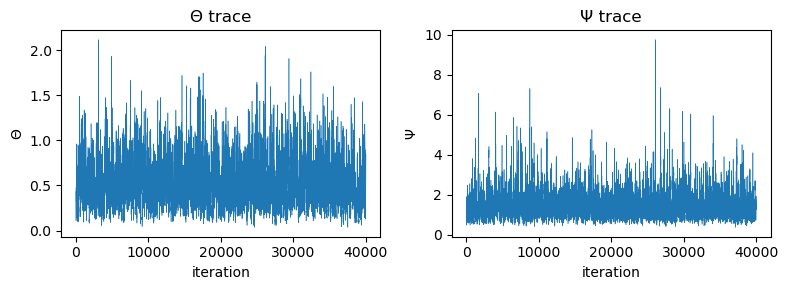

In [59]:
#6.3 c and d

# ------------------------------------------------------------
#  Bayesian normal-mean / variance example
#  posterior density  +  Metropolis–Hastings sampler
# ------------------------------------------------------------
import math, random
import numpy as np
from matplotlib import pyplot as plt

# ----------  (a)  one prior draw and (b) one synthetic sample ----------
rho = 0.5                       # prior correlation between log-Theta & log-Psi
xi,  gamma = np.random.multivariate_normal(
        mean=[0,0],
        cov=[[1, rho],[rho, 1]]
)                               # (ξ,γ)  ~  N(0,Σ)
theta0 = math.exp(xi)           # Θ  = e^ξ   ( strictly positive )
psi0   = math.exp(gamma)        # Ψ  = e^γ   ( strictly positive )

np.random.seed(123)             # reproducibility for the toy data set
data   = np.random.normal(loc=theta0, scale=math.sqrt(psi0), size=10)  # n = 10
n      = len(data)
ybar   = data.mean()
s2     = data.var(ddof=1)
print(f"truth: Θ={theta0:.3f}, Ψ={psi0:.3f}   |   sample mean={ybar:.3f},  s²={s2:.3f}")

# ----------  (c)  un-normalised log-posterior density ----------
def log_prior(theta, psi):
    """Bivariate N(0,1) on (log θ, log ψ) with ρ = 0.5  (unnormalised)."""
    if theta <= 0 or psi <= 0:
        return -math.inf
    xi, gamma = math.log(theta), math.log(psi)
    q  = xi**2 - 2*rho*xi*gamma + gamma**2
    return -0.5*q/(1 - rho**2)

def log_likelihood(theta, psi):
    """Normal(θ,ψ) likelihood for the fixed data sample (unnormalised)."""
    if psi <= 0:
        return -math.inf
    ss = ((data - theta)**2).sum()
    return -0.5*n*math.log(psi) - 0.5*ss/psi

def log_posterior(theta, psi):
    return log_prior(theta, psi) + log_likelihood(theta, psi)

# ----------  (d)  very plain Metropolis-Hastings on (log θ, log ψ) ----------
draws  = 50_000
burn   = 10_000
keep   = draws - burn
log_sd = 0.20                    # step–size on the log-scale  (~20 % moves)

cur_t, cur_p = ybar, s2          # sensible starting point: sample estimates
chain = []

for k in range(draws):
    # propose in log–space  (log-normal random-walk)
    prop_t = cur_t * math.exp(np.random.normal(scale=log_sd))
    prop_p = cur_p * math.exp(np.random.normal(scale=log_sd))

    log_acc = log_posterior(prop_t, prop_p) - log_posterior(cur_t, cur_p)
    if math.log(random.random()) < log_acc:      # accept
        cur_t, cur_p = prop_t, prop_p

    if k >= burn:
        chain.append((cur_t, cur_p))

chain = np.array(chain)          # shape (keep, 2)  – columns Θ, Ψ

print(f"\nposterior means  Θ̂={chain[:,0].mean():.3f}, Ψ̂={chain[:,1].mean():.3f}")

# ----------  quick visual check ----------
fig, ax = plt.subplots(1,2, figsize=(8,3))
ax[0].plot(chain[:,0], lw=.4);  ax[0].set_title('Θ trace'); ax[0].set_ylabel('Θ')
ax[1].plot(chain[:,1], lw=.4);  ax[1].set_title('Ψ trace'); ax[1].set_ylabel('Ψ')
for a in ax: a.set_xlabel('iteration')
plt.tight_layout(); plt.show()

n=  10  → posterior means  Θ̂=1.505, Ψ̂=1.725
n= 100  → posterior means  Θ̂=1.897, Ψ̂=1.209
n=1000  → posterior means  Θ̂=1.844, Ψ̂=0.924


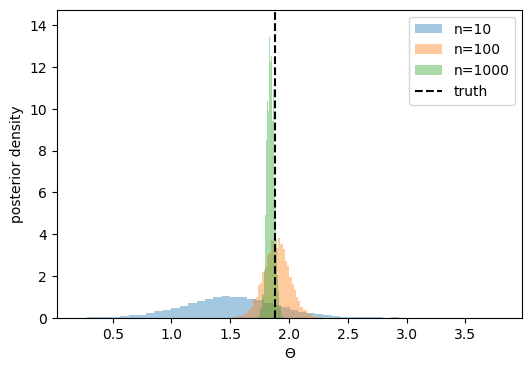

In [67]:
# ---------- put everything that depends on the DATA in a function ----------
def mh_posterior_draws(data, draws=50_000, burn=10_000, log_sd=0.20):
    """Return an (draws-burn, 2) array of MH samples for (Θ,Ψ)."""
    n  = len(data)                          # sample size now varies
    ȳ  = data.mean()
    s2 = data.var(ddof=1)

    # --- log–posterior pieces, identical apart from n, data, ȳ, s2 ---
    def log_prior(theta, psi):              # unchanged
        if theta<=0 or psi<=0: return -math.inf
        xi, γ = math.log(theta), math.log(psi)
        q  = xi**2 - 2*rho*xi*γ + γ**2       # rho = 0.5 from earlier
        return -0.5*q/(1-rho**2)

    def log_like(theta, psi):
        if psi<=0: return -math.inf
        return -0.5*n*math.log(psi) - 0.5*((data-theta)**2).sum()/psi

    def log_post(theta,psi):                # closure captures n & data
        return log_prior(theta,psi) + log_like(theta,psi)

    # --- MH loop (same as before) ---
    cur_t, cur_p = ȳ, s2                   # start at sample estimates
    keep = draws - burn
    chain = np.empty((keep,2))

    for k in range(draws):
        prop_t = cur_t * math.exp(np.random.normal(scale=log_sd))
        prop_p = cur_p * math.exp(np.random.normal(scale=log_sd))
        if math.log(random.random()) < log_post(prop_t,prop_p) - log_post(cur_t,cur_p):
            cur_t, cur_p = prop_t, prop_p
        if k >= burn:
            chain[k-burn] = (cur_t, cur_p)
    return chain
# ---------------------------------------------------------------------------

# ---------- still the SAME true parameters from 3(a) ----------
true_theta, true_psi = theta0, psi0          # drawn earlier

# ---------- (e)   run for n = 10, 100, 1000 ------------------
sizes   = [10, 100, 1000]
chains  = {}

for n in sizes:
    np.random.seed(123)                      # keep comparability
    sample = np.random.normal(loc=true_theta,
                              scale=math.sqrt(true_psi),
                              size=n)
    chains[n] = mh_posterior_draws(sample)   # store raw chains
    print(f"n={n:4d}  → posterior means  Θ̂={chains[n][:,0].mean():.3f}, "
          f"Ψ̂={chains[n][:,1].mean():.3f}")

# quick visual comparison of the marginal posterior for Θ
plt.figure(figsize=(6,4))
for n,c in chains.items():
    plt.hist(c[:,0], bins=50, density=True, alpha=.4, label=f'n={n}')
plt.axvline(true_theta, color='k', ls='--', label='truth')
plt.xlabel('Θ'); plt.ylabel('posterior density'); plt.legend(); plt.show()